In [389]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
np.random.seed(42)

In [338]:
k = 10

In [339]:
# actual_mean = np.array([0.5, -0.8, 1.8, 1, 1.5, -1.4, -0.2, -1, 0.8, -0.3])
actual_mean = np.random.uniform(-1,1, k)
optimal_arm = np.argmax(actual_mean)
actual_mean

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516])

In [340]:
def draw(k):
    return np.random.normal(actual_mean[k], 3)
draw(2)

-0.9444352741820461

In [347]:
initial_value = [None for _ in range(len(actual_mean))]

for arm in range(k):
    initial_value[arm] = np.array([draw(arm) for _ in range(1)]).mean()
    
# estimated_value = np.array([0] * k)

In [351]:
len(run(T = 1000, initial_value = initial_value, strategy = 'greedy')) , len(run(T = 1000, initial_value = initial_value))

(1000, 1000)

In [384]:
draw = lambda actual_mean, i: np.random.normal(actual_mean[i], 3)

-1.7573428937671454

In [426]:
def k_armed_testbed(k = 10, N = 100, T = 1000, epsilon = 0.1, initial_value = None, strategy = 'epsilon-greedy'):
    
    avg_reward = None
    draw = lambda actual_mean, i: np.random.normal(actual_mean[i], 2)
    
    for n in range(N):
    
        actual_mean = np.random.uniform(-1,1, k)
        optimal_arm = np.argmax(actual_mean)

        if initial_value is None:
            initial_value = [None for _ in range(k)]
            for arm in range(k):
                initial_value[arm] = np.array([draw(actual_mean, arm) for _ in range(1)]).mean()
                
        elif initial_value == 'zeroes':
            initial_value = [0] * k


        arms_pulled_frequency = dict(zip(range(k), [1]*k))
        estimated_value = initial_value

        total_reward_collected = 0
        running_avg_reward = []

        for t in range(1, T+1):

            choice = choice = np.random.choice(['Explore', 'Exploit'], p = [epsilon, 1-epsilon]) #epsilon-greedy by default
            if strategy == 'greedy':
                choice = 'Exploit'

            if choice == 'Exploit':
                arm_selected = np.argmax(estimated_value)    
            elif choice == 'Explore':
                arm_selected = np.random.choice(range(0, k))

            arms_pulled_frequency[arm_selected] += 1

            step_size = 1 / arms_pulled_frequency[arm_selected] # Sample average method for action value estimation (i.e. Q (a)) 
            # step_size = 0.5 # Constant step size for exponential recency-weighted average, used for non-stationaery problems

            payout = draw(actual_mean, arm_selected)
            total_reward_collected += payout
            running_avg_reward.append(total_reward_collected / t)

            #update value estimation based on payout
            estimated_value[arm_selected] = estimated_value[arm_selected] + step_size * (payout - estimated_value[arm_selected])
        
        if avg_reward is None:
            avg_reward = np.array(running_avg_reward)
        else:
            avg_reward += np.array(running_avg_reward)
            
    avg_reward /= N

    return avg_reward

In [431]:
T = 1000
N = 1000
e_greedy1 = k_armed_testbed(T = T, N = N, strategy = 'epsilon-greedy', epsilon = 0.1, initial_value = 'zeroes')
e_greedy2 = k_armed_testbed(T = T, N = N, strategy = 'epsilon-greedy', epsilon = 0.01, initial_value = 'zeroes')
greedy = k_armed_testbed(T = T, N = N, strategy = 'greedy', initial_value = 'zeroes')

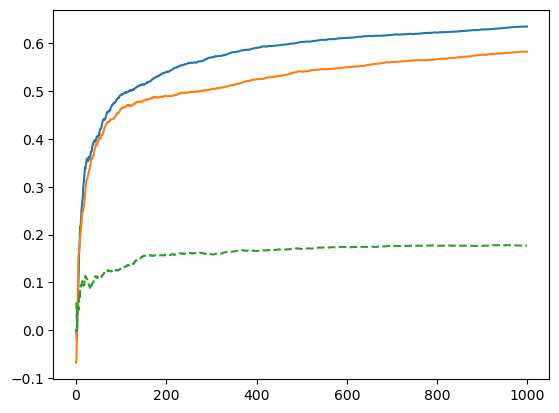

In [414]:
#STD = 1
plt.plot(range(T), e_greedy1)
plt.plot(range(T), e_greedy2)
plt.plot(range(T),greedy , '--')
plt.show()

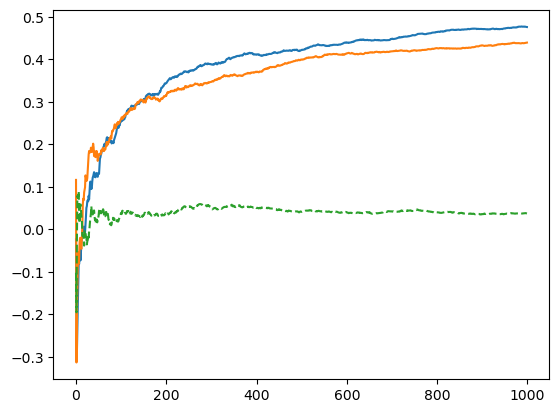

In [417]:
#STD = 3
plt.plot(range(T), e_greedy1)
plt.plot(range(T), e_greedy2)
plt.plot(range(T),greedy , '--')
plt.show()

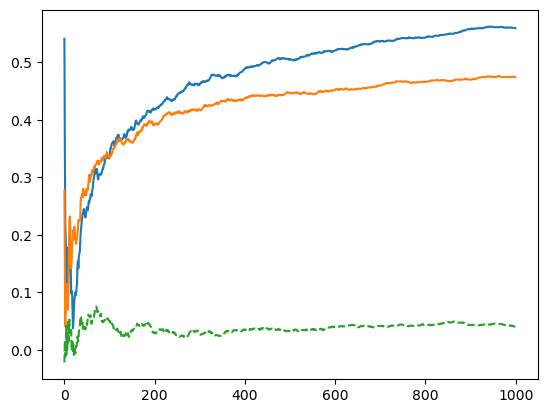

In [425]:
#STD = 3, initial = 0s
plt.plot(range(T), e_greedy1)
plt.plot(range(T), e_greedy2)
plt.plot(range(T),greedy , '--')
plt.show()

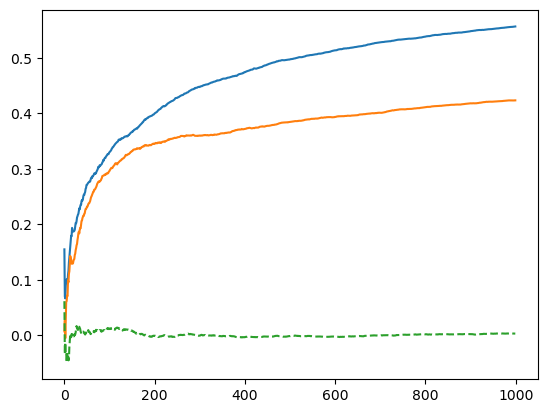

In [429]:
#STD = 3, N = 1000
plt.plot(range(T), e_greedy1)
plt.plot(range(T), e_greedy2)
plt.plot(range(T),greedy , '--')
plt.show()

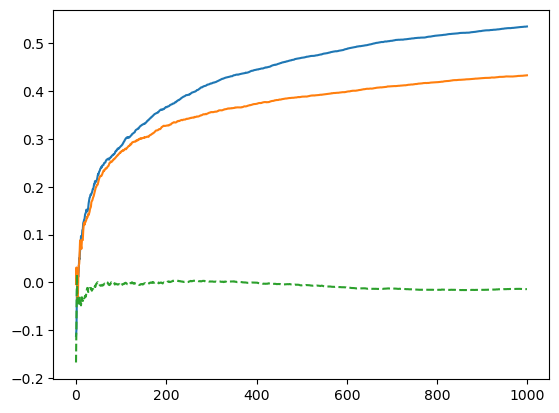

In [433]:
#STD = 3, N = 1000, initial zeroes
plt.plot(range(T), e_greedy1)
plt.plot(range(T), e_greedy2)
plt.plot(range(T),greedy , '--')
plt.show()